LOGISTIC REGRESSION

In [3]:

import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
train=pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


NOW WE WIL USE HEATMAP TO VISUALIZE ABOUT THE MISSING DATA

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

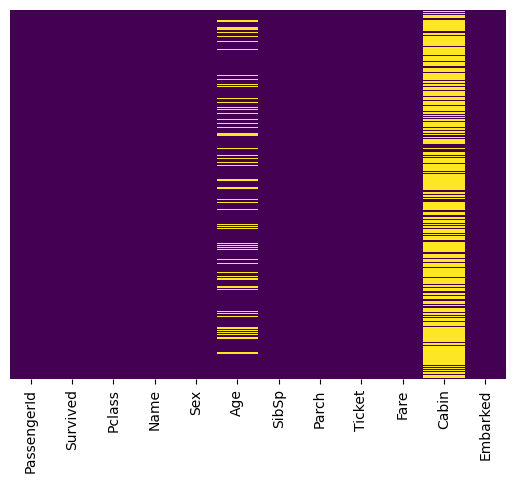

In [7]:
sns.heatmap(train.isnull(), cmap='viridis',yticklabels=False, cbar=False)

<Axes: xlabel='Survived', ylabel='count'>

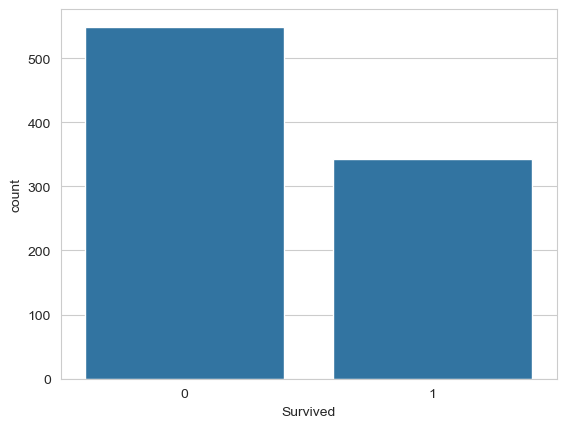

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

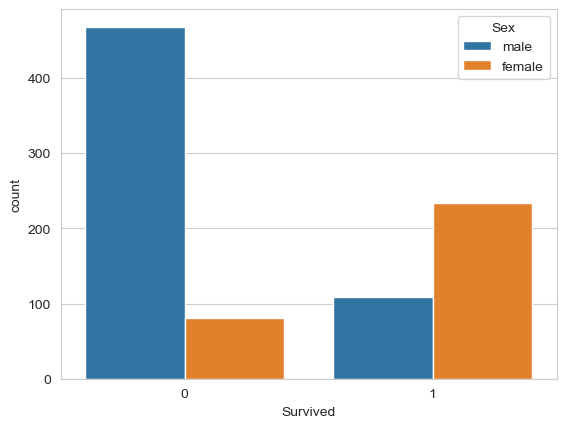

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

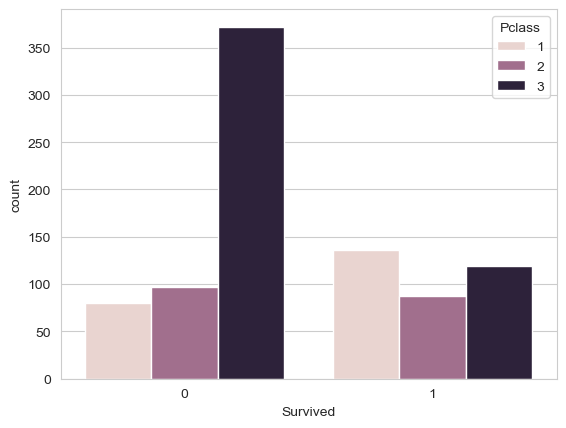

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Pclass')

C:\Users\hp\AppData\Local\Temp\ipykernel_3820\27408363.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde=False, bins=60)


<Axes: xlabel='Age'>

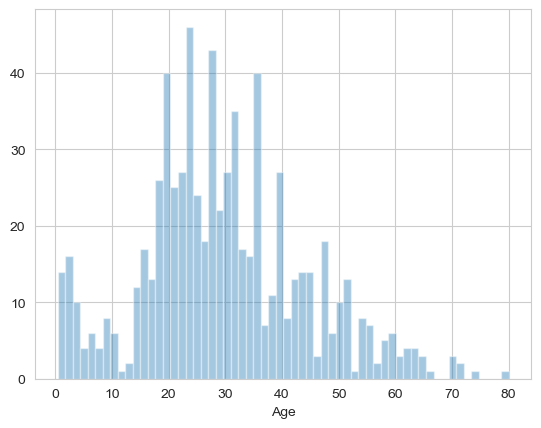

In [11]:
sns.distplot(train['Age'].dropna(), kde=False, bins=60)

<Axes: xlabel='SibSp', ylabel='count'>

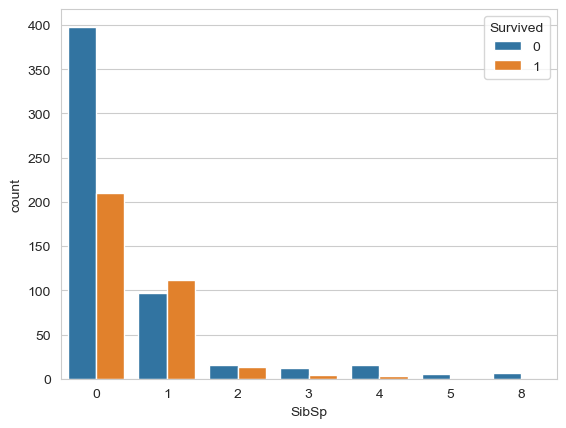

In [12]:
sns.countplot(x='SibSp', data=train, hue='Survived')

<Axes: xlabel='Fare', ylabel='Count'>

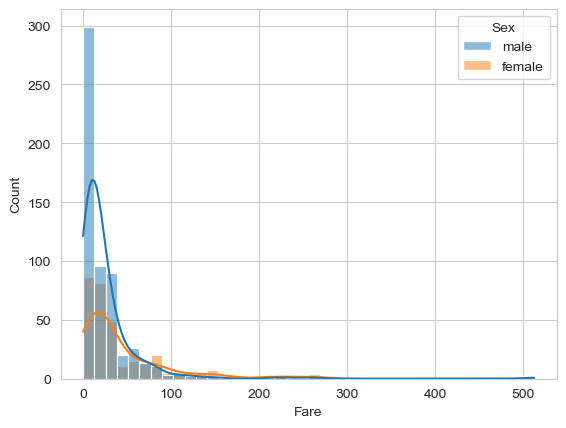

In [13]:
sns.histplot(data=train, x='Fare', bins=40, kde=True, hue='Sex')

<Axes: xlabel='Fare', ylabel='Count'>

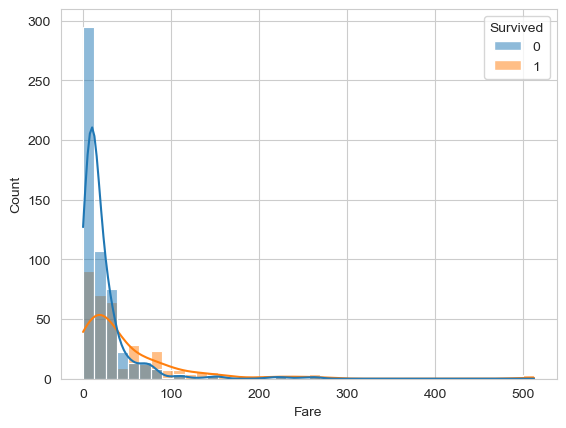

In [14]:
sns.histplot(data=train, x='Fare', bins=40, kde=True, hue='Survived')

<Axes: xlabel='Fare', ylabel='Count'>

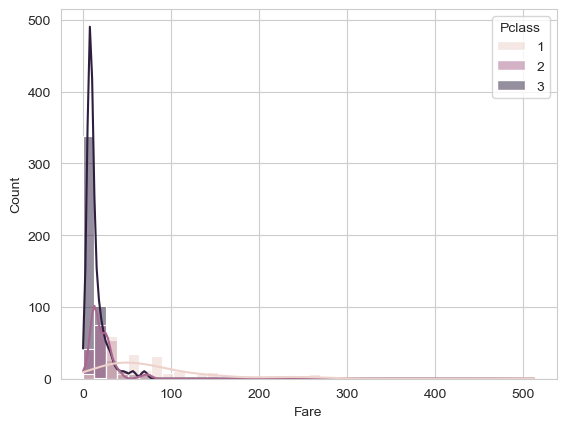

In [15]:
sns.histplot(data=train, x='Fare', bins=40, kde=True, hue='Pclass')

In [16]:
import cufflinks as cf
cf.go_offline()

In [17]:
train['Fare'].iplot(kind='hist', bins=40)

In [18]:
train['Fare'].iplot(kind='hist', bins=40)

## NOW WE WILL CLEAN THE DATA

PART 2 OF THE LOGISTIC REGRESSION

<Axes: >

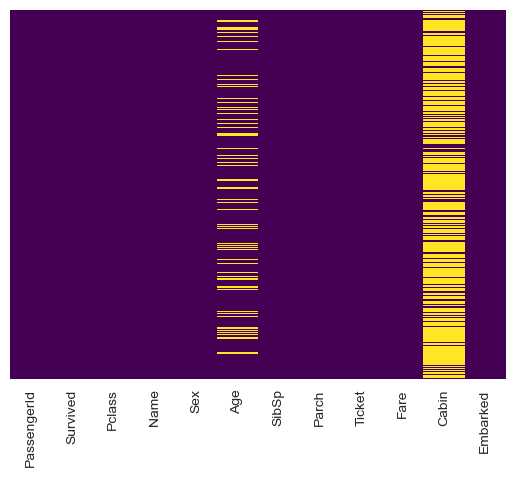

In [19]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

SINCE WE CAN OBSERVE THAT PASSENGER CLASS DIRECTLY CORELATED WITH AGE WE CAN FILL OUT THE MISSING VALUES OF AGE 

<Axes: xlabel='Pclass', ylabel='Age'>

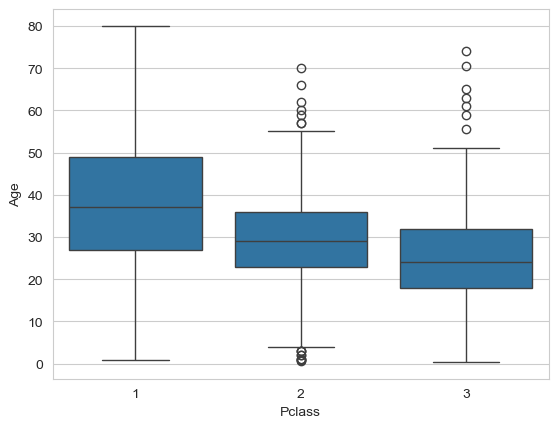

In [20]:
plt.Figure(figsize=(12,4))
sns.boxplot(x='Pclass', y='Age', data=train)

In [21]:
class_1_mean_age=train[train['Pclass']==1]['Age'].mean()

In [22]:
class_2_mean_age=train[train['Pclass']==2]['Age'].mean()

In [23]:
class_3_mean_age=train[train['Pclass']==3]['Age'].mean()

In [24]:
def fill_age(col):
    Age=col[0]; Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            Age=class_1_mean_age
        elif Pclass==2:
            Age=class_2_mean_age
        else:
            Age=class_3_mean_age
    return Age

In [25]:
train['Age']=train[['Age','Pclass']].apply(fill_age,axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_3820\4002787578.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train['Age'].isnull().unique()

array([False])

<Axes: >

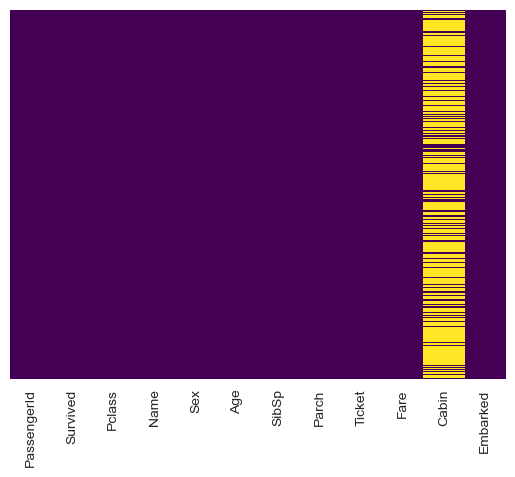

In [28]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False, cbar=False)

SINCE CABIN DATA IS TOO EMPTY WE CAN'T PREDICT ANYTHING OUT OF IT SO WE DROP IT

In [29]:
train.drop(['Cabin'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


LECTURE-03

PART 3

THE CONCEPT OF MULTICOLINEARITY

WE WILL USE .get_dummies() TO CONVERT CATEGORICAL DATA INTO NUMERICAL ONES

In [31]:
sex=pd.get_dummies(train['Sex'], drop_first=True)


HERE THE drop_first SYMBOLISES THAT WE CAN TAKE ONE OF THE TWO COULMNS SINCE BOTH ARE OPPOSITES WE CAN REFER THE DATA FOR ANOTHER ONE WITH THE SAME 

In [32]:
embarked=pd.get_dummies(train['Embarked'], drop_first=1)

In [33]:
train=pd.concat([train,sex,embarked], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False,True


In [34]:
train.drop(['Name','Sex','Cabin','Embarked','Ticket'], axis=1, inplace=True)

In [35]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [36]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [37]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


LECTURE-04

NOW AFTER CLEANING OUR DATA WE WILL TRAIN IT

In [38]:
x=train.drop(['Survived'], axis=1)
y=train['Survived']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel=LogisticRegression()

In [43]:
logmodel.fit(x_train,y_train)

f:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [44]:
predictions=logmodel.predict(x_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, predictions)

array([[135,  19],
       [ 38,  76]], dtype=int64)

FINAL PART

NOW WE WILL USE THE GIVEN TEST DATA INSTEAD TO TEST AND COMPLETE TRAIN DATA TO TRAIN

In [53]:
x_train=train.drop(['Survived'], axis=1)
y_train=train['Survived']

In [54]:
logmodel.fit(x_train,y_train)

f:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [55]:
test=pd.read_csv('titanic_test.csv')

In [56]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
sex=pd.get_dummies(test['Sex'], drop_first=True)
embarked=pd.get_dummies(test['Embarked'], drop_first=True)
test=pd.concat([test,sex,embarked], axis=1)

In [60]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,True,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True


In [63]:
test.drop(['PassengerId','Name','Sex', 'Ticket', 'Cabin','Embarked'], axis=1,inplace=True)

In [64]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


<Axes: >

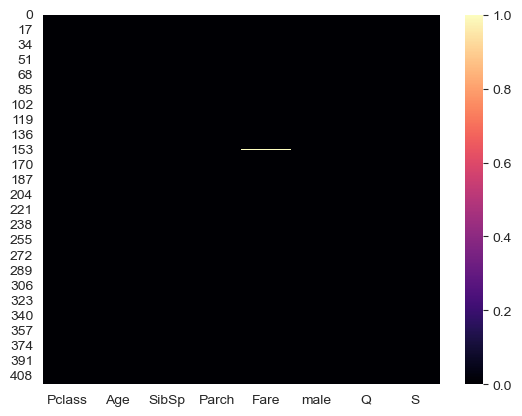

In [76]:
sns.heatmap(test.isnull(), cmap='magma')

In [77]:
class_1_mean_age=test[test['Pclass']==1]['Age'].mean()
class_2_mean_age=test[test['Pclass']==2]['Age'].mean()
class_3_mean_age=test[test['Pclass']==3]['Age'].mean()

In [78]:
class_1_mean_age

40.91836734693878

In [79]:
def test_fill_na_age(col):
    age=col[0]; pclass=col[1]
    if pd.isnull(age):
        if pclass==1:
            age=class_1_mean_age
        elif pclass==2:
            age=class_2_mean_age
        else:
            age=class_3_mean_age
    return age

In [80]:
test['Age']=test[['Age','Pclass']].apply(test_fill_na_age,axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_3820\2279516905.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

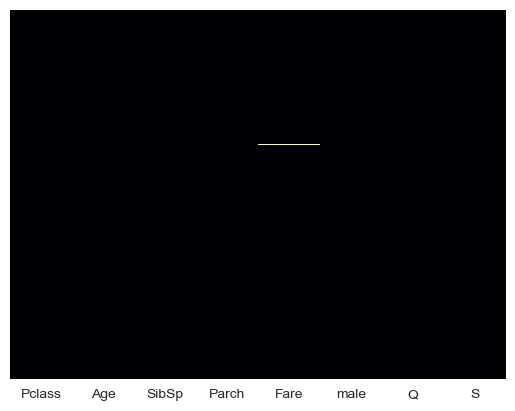

In [82]:
sns.heatmap(test.isnull(), cmap='magma', cbar=False, yticklabels=False)

In [88]:
test.dropna(inplace=True)

<Axes: >

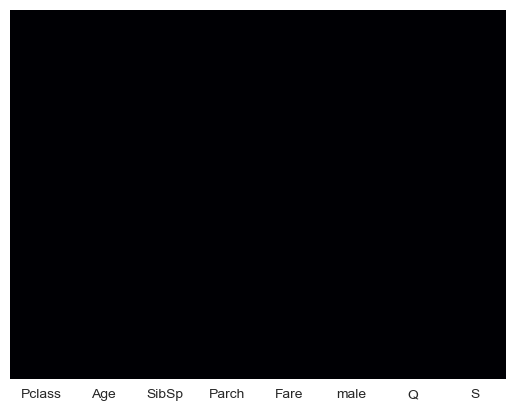

In [89]:
sns.heatmap(test.isnull(), cmap='magma', cbar=False, yticklabels=False)

TEST DATA IS NOW CLEANED

In [90]:
x_test=test

In [91]:
predictions=logmodel.predict(x_test)

In [92]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,